In [1]:
catalog.list()

['personal-finance', 'parameters']

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = catalog.load("personal-finance")
pd.options.display.float_format = '{:.4f}'.format
df.head()


[01/12/25 22:10:15] INFO     Loading data from personal-finance (CSVDataset)...                 data_catalog.py:389

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.2496,49,0,Self_Employed,Tier_1,13391.1749,0.0000,2206.4901,6658.7683,2636.9707,...,6200.5372,11265.6277,1685.6962,328.8953,465.7692,195.1513,678.2929,67.6825,0.0000,85.7355
1,26858.5966,34,2,Retired,Tier_2,5371.7193,0.0000,869.5226,2818.4445,1543.0188,...,1923.1764,9676.8187,540.3066,119.3471,141.8661,234.1312,286.6684,6.6032,56.3069,97.3886
2,50367.6051,35,1,Student,Tier_3,7555.1408,4612.1034,2201.8000,6313.2221,3221.3964,...,7050.3604,13891.4506,1466.0740,473.5498,410.8571,459.9653,488.3834,7.2909,106.6536,138.5424
3,101455.6002,21,0,Self_Employed,Tier_3,15218.3400,6809.4414,4889.4181,14690.1494,7106.1300,...,16694.9651,31617.9536,1875.9328,762.0208,1241.0174,320.1906,1389.8150,193.5028,0.0000,296.0412
4,24875.2835,52,4,Professional,Tier_2,4975.0567,3112.6094,635.9072,3034.3297,1276.1552,...,1874.0994,6265.7005,788.9531,68.1608,61.7125,187.1738,194.1171,47.2946,67.3881,96.5571


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [14]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [15]:
df.isnull().sum()


Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0


## 2. Single variable analysis

### 2.1 Income Distribution
Understanding the distribution of income helps in identifying skewness and outliers.

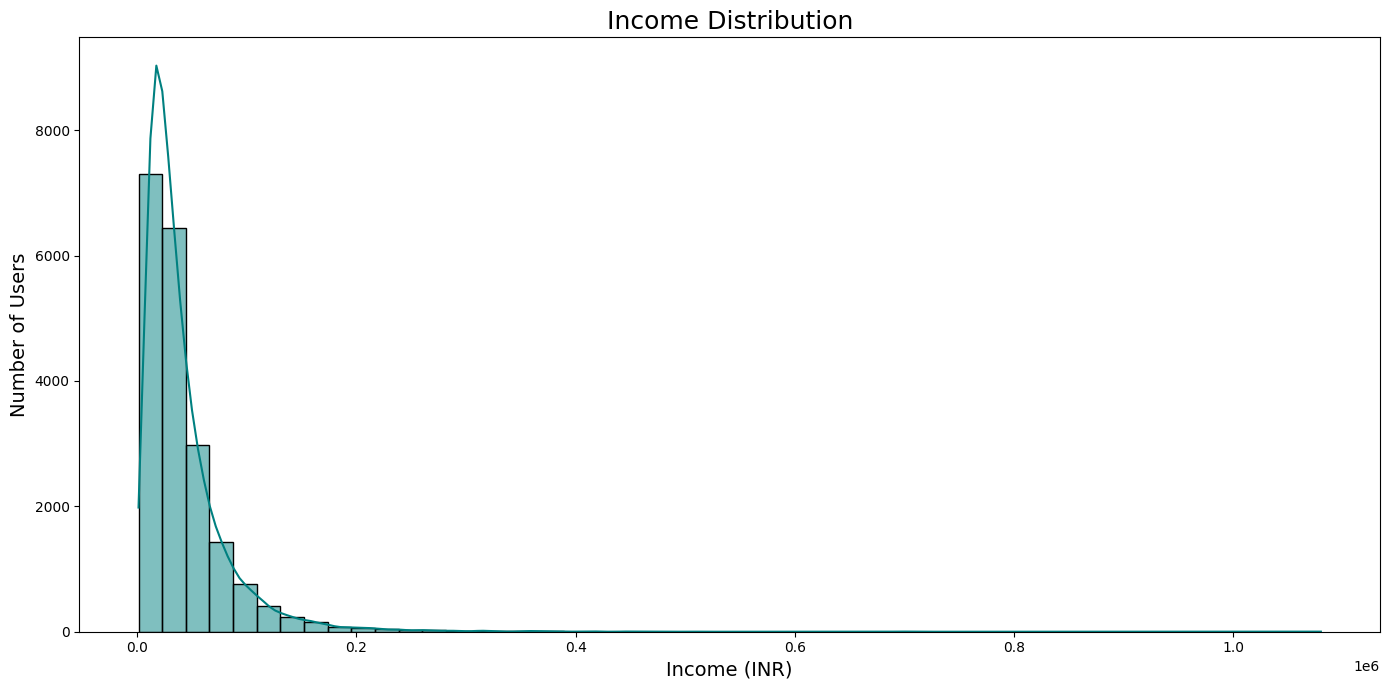

In [23]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Income'], bins=50, kde=True, color='teal')
plt.title('Income Distribution', fontsize=18)
plt.xlabel('Income (INR)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()


Observations:
The income distribution is right-skewed, indicating a majority of users have lower incomes with a few high earners.

### 2.2 Age Distribution
Analyzing the age distribution provides insights into the demographics of the users.

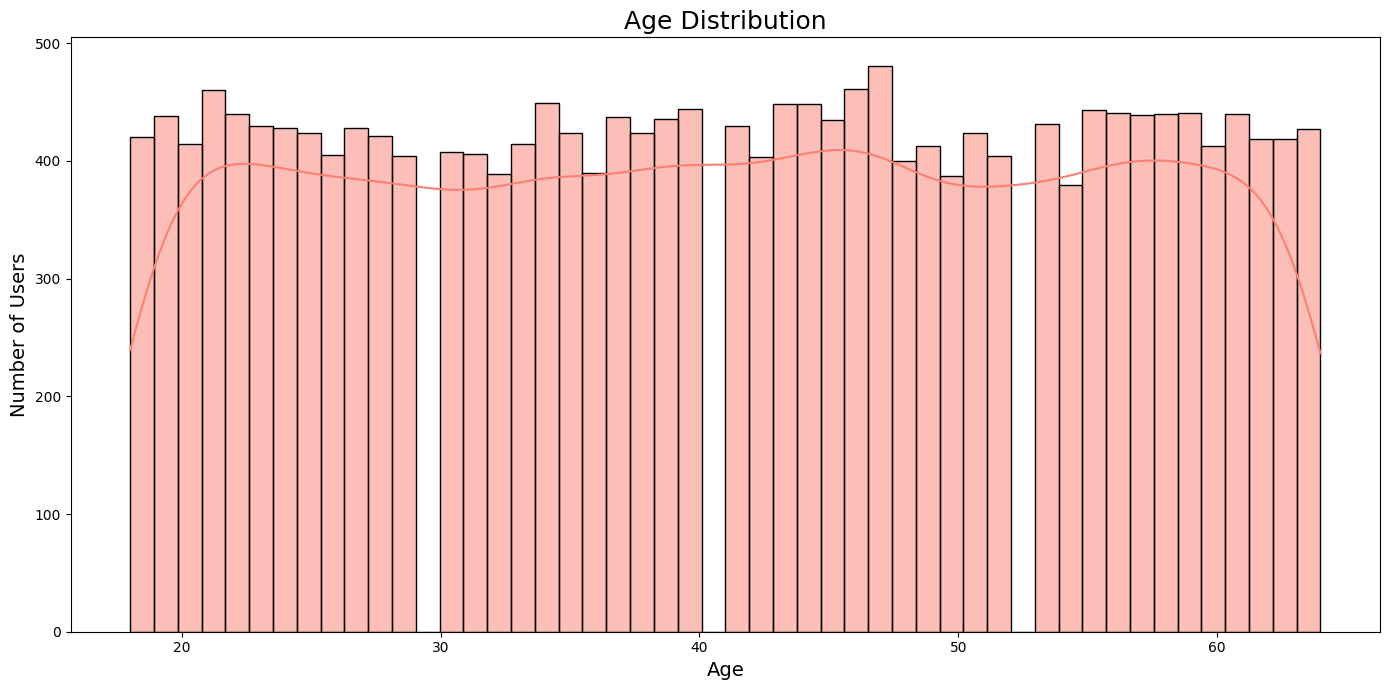

In [27]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Age'], bins=50, kde=True, color='salmon')
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

Observations:
The age groups between 20 and 60 show a fairly uniform distribution, with the number of users in each age bracket staying relatively consistent, around 400 users. This suggests that the user base is evenly spread across this age range.

### 2.3 Dependents
Analyzing the dependets distribution provides insights into the demographics of the users.

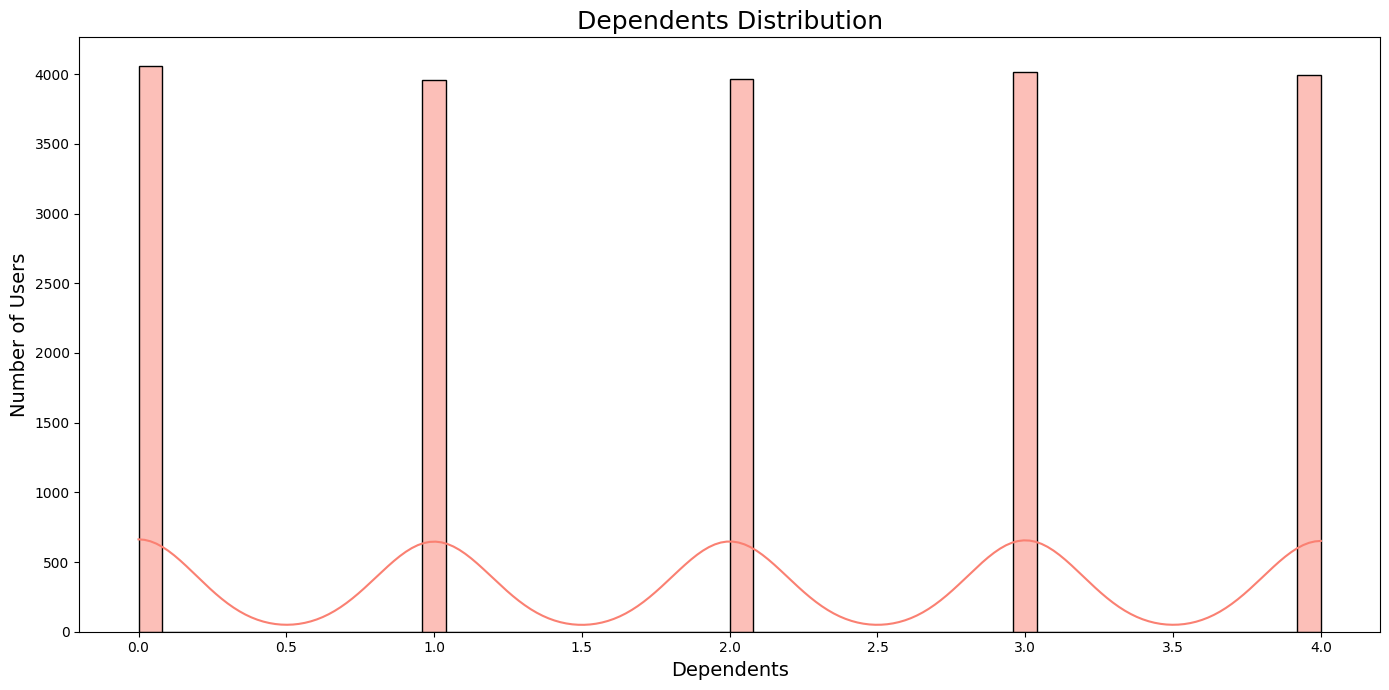

In [36]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Dependents'], bins=50, kde=True, color='salmon')
plt.title('Dependents Distribution', fontsize=18)
plt.xlabel('Dependents', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

Observations:
Grapth suggests that the user base is evenly spread across this number of dependents ( 0 to 4).

### 2.3 City Tier Distribution
City tier impacts income and expense patterns. Let's visualize its distribution.

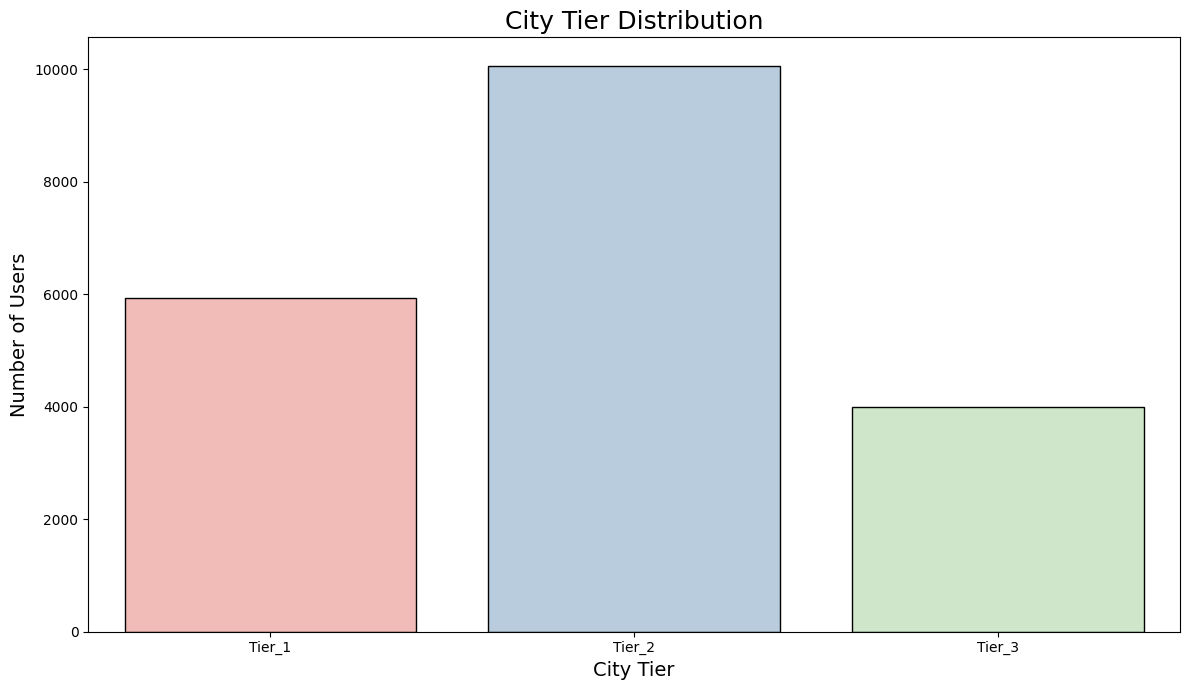

In [35]:
plt.figure(figsize=(12, 7))
sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')
plt.title('City Tier Distribution', fontsize=18)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

Observations:
Tier 2 cities have the highest number of users, followed by Tier 1 and Tier 3.

## 3. Expense Analysis
### 3.1 Fixed Expenses
Fixed expenses include Rent, Loan Repayment, and Insurance. Let's analyze their distributions.

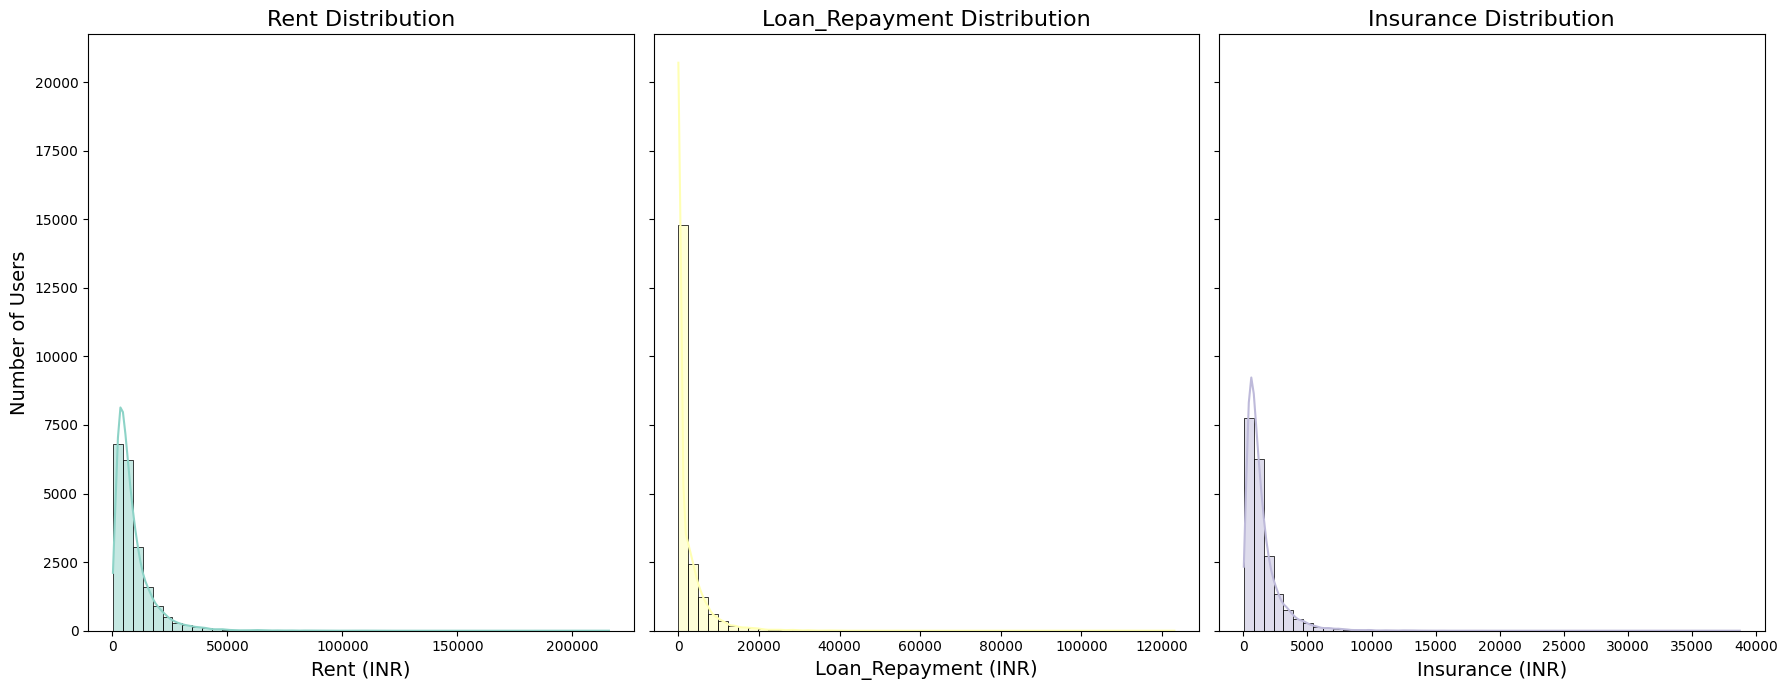

In [30]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
num_fixed = len(fixed_expenses)

fixed_palette = sns.color_palette("Set3", num_fixed)

fig, axes = plt.subplots(1, num_fixed, figsize=(18, 7), sharey=True)

for ax, expense, color in zip(axes, fixed_expenses, fixed_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

Observations:

Rent Distribution:
The majority of users pay a relatively low rent, with a sharp peak at lower rent values (likely below 20,000 INR).
The distribution is right-skewed, with a small number of users paying higher rents, extending up to 200,000 INR.
This could suggest that a significant portion of users live in less expensive regions or that housing affordability varies widely, possibly due to differences between urban and rural areas.

Loan Repayment Distribution:
A prominent spike at or near zero indicates that a substantial proportion of users have no loan repayment obligations.
For those with loan repayments, the amounts are relatively low, with a rapid decline in the number of users as repayment amounts increase.
The overall distribution is highly right-skewed, showing that few users have high monthly loan repayments (up to 120,000 INR).

Insurance Distribvariable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]
num_variable = len(variable_expenses)

variable_palette = sns.color_palette("Set2", num_variable)

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for ax, expense, color in zip(axes, variable_expenses, variable_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()
ution:
Insurance premiums are generally low, with the majority of users paying minimal amounts (likely below 5,000 INR).
Similar to the other distributions, this data is also right-skewed, indicating that while most users pay small amounts for insurance, a few pay significantly higher premiums, extending up to 40,000 INR.
This suggests that a large proportion of users may have basic or minimal insurance coverage, with fewer opting for comprehensive or higher-value plans.

### 3.2 Variable Expenses
Variable expenses include Groceries, Transport, Eating Out, Entertainment, Utilities, Healthcare, Education, and Miscellaneous.

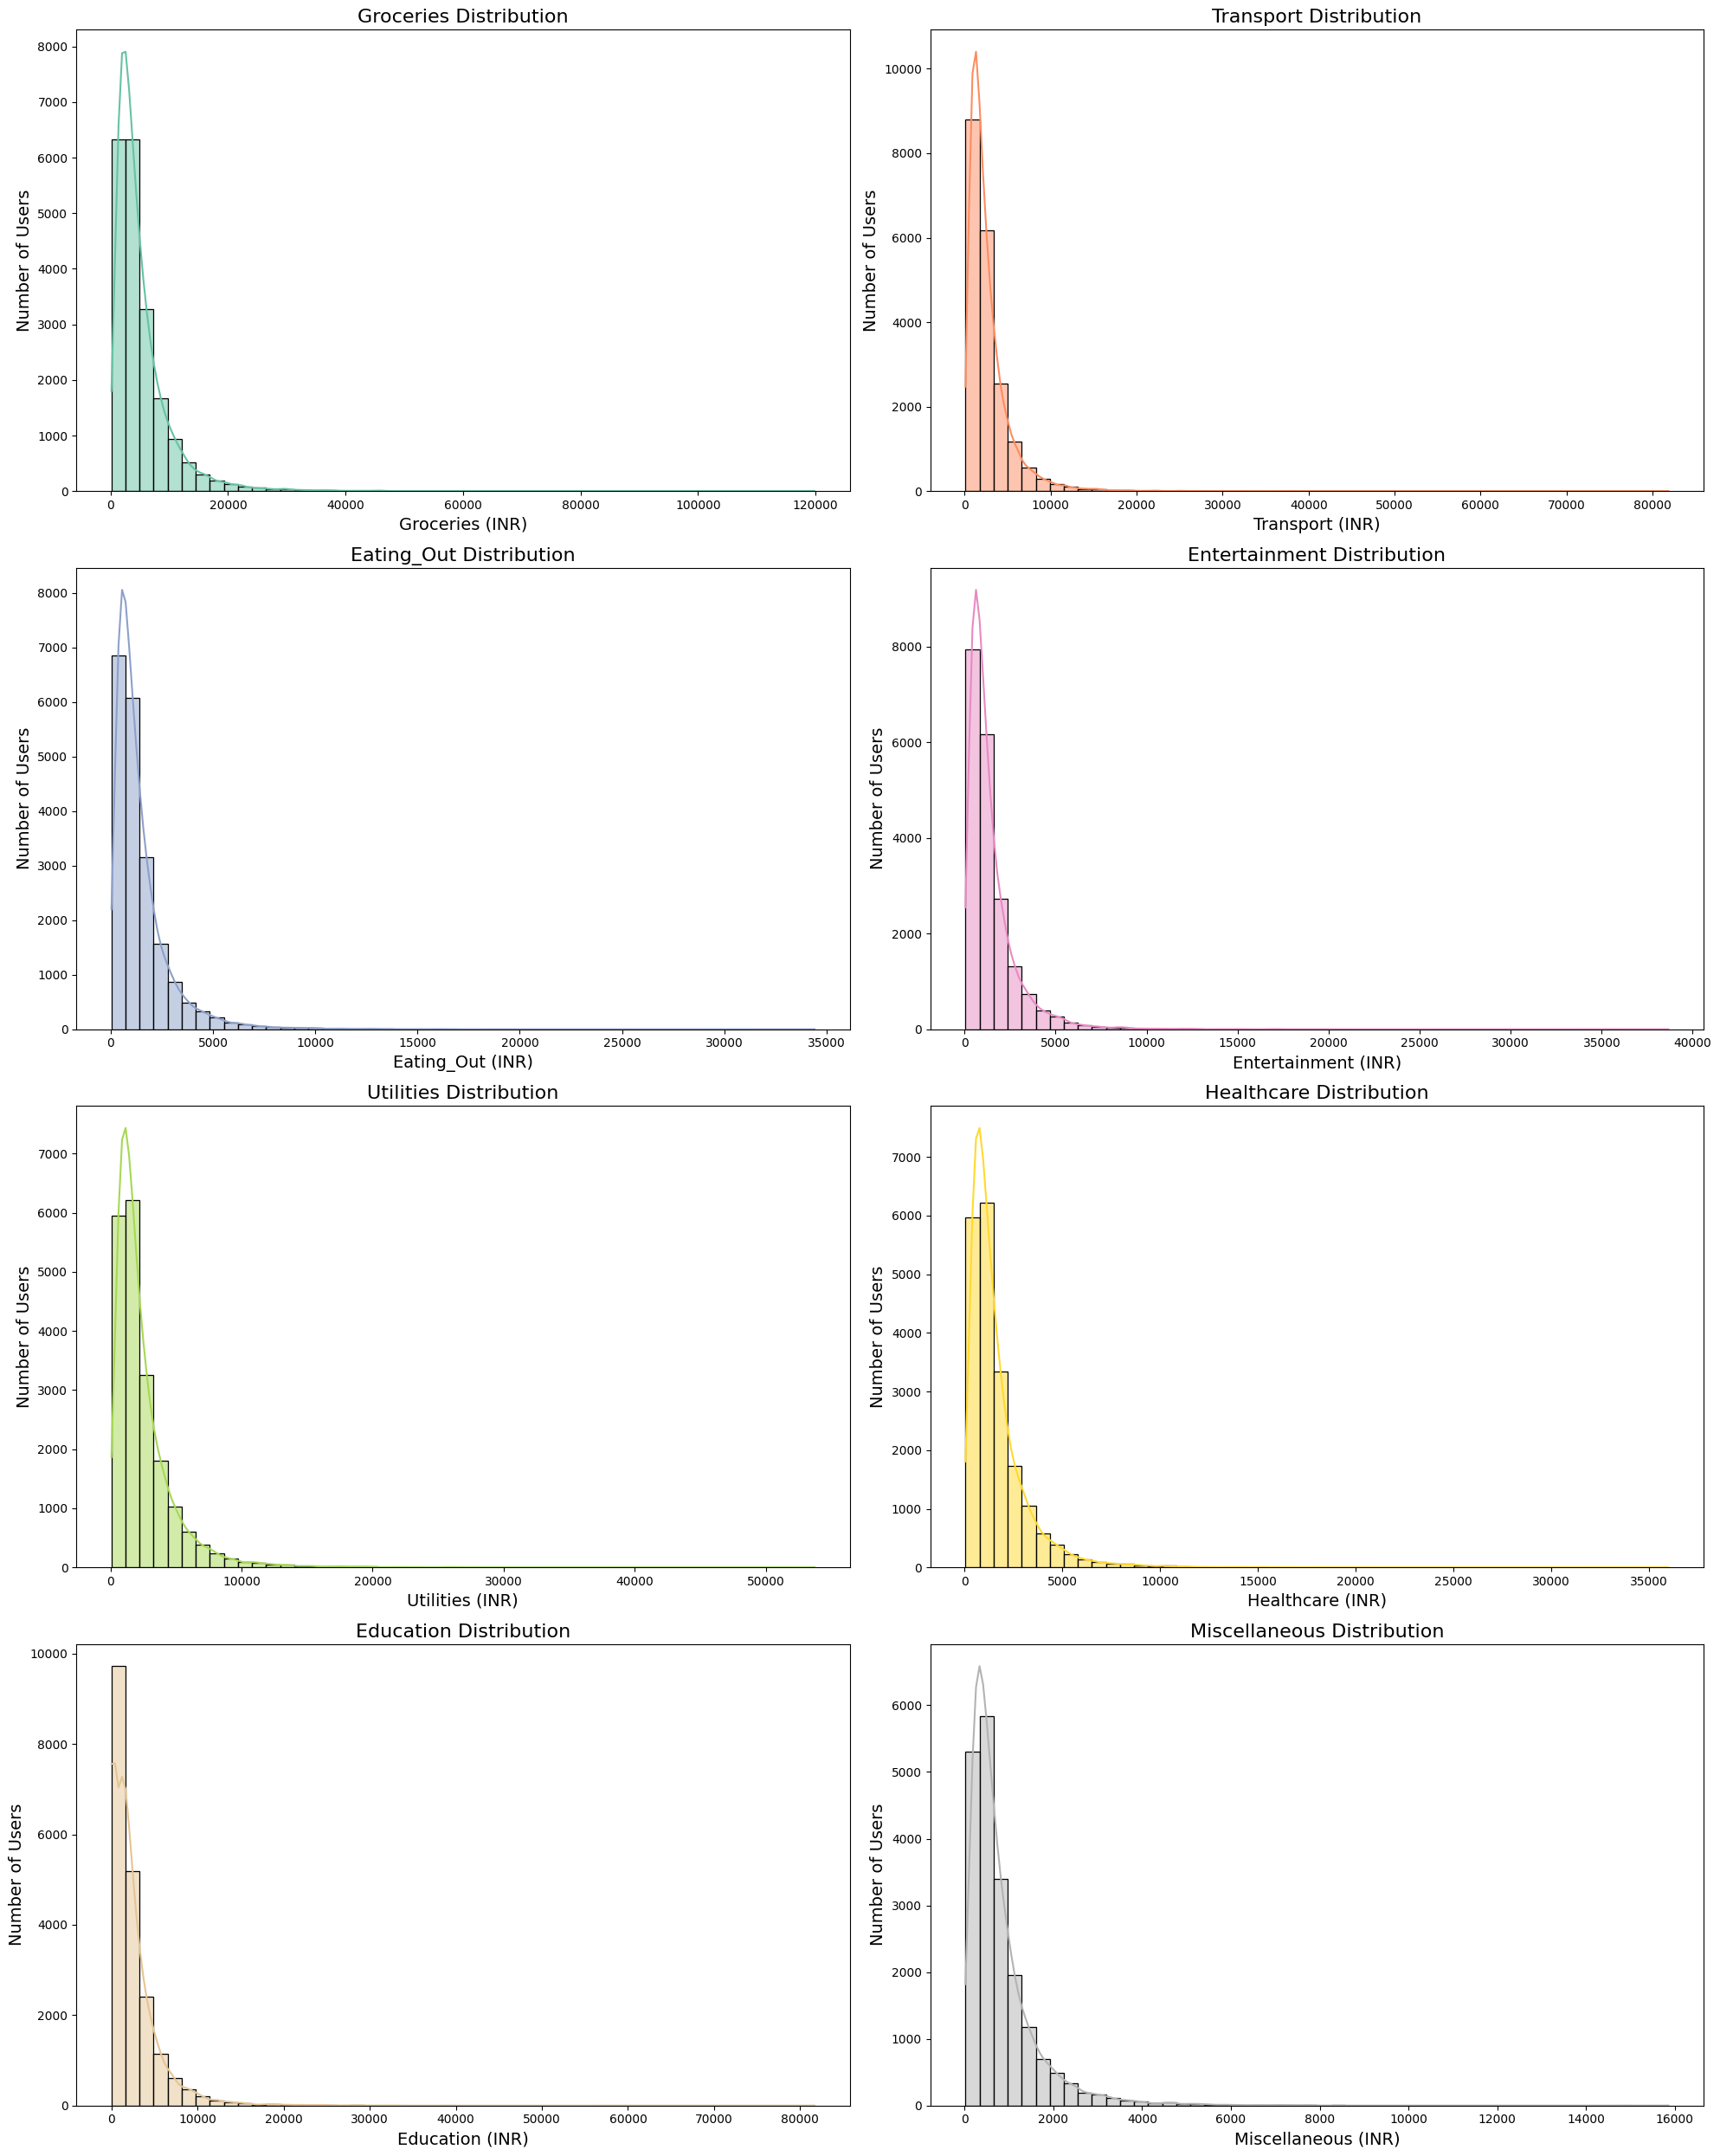

In [31]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]
num_variable = len(variable_expenses)

variable_palette = sns.color_palette("Set2", num_variable)

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for ax, expense, color in zip(axes, variable_expenses, variable_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

Observations:
Groceries: Most users spend less than 20,000 INR on groceries, with a few outliers spending significantly more. This indicates that the majority of users maintain moderate grocery expenses.

Transport: The majority of users have transport expenses below 10,000 INR, with a sharp decline beyond this point, suggesting limited high transport expenditures among users.

Eating Out: Most users spend below 5,000 INR on eating out, with a few spending more, indicating that dining out is not a significant expense for most.

Entertainment: Entertainment expenses are generally below 5,000 INR, with the majority of users spending minimal amounts in this category, reflecting lower discretionary spending.

Utilities: Users primarily have utility expenses under 10,000 INR, with a few outliers, suggesting stable and predictable utility costs for most.

Healthcare: Healthcare expenses are generally low, with most users spending less than 5,000 INR, indicating limited spending on medical needs among the majority.

Education: Education-related expenses are primarily below 10,000 INR, indicating that high educational costs are rare among users.

Miscellaneous: Most users have miscellaneous expenses below 2,000 INR, with a few higher expenditures, indicating that additional unclassified expenses are typically small.

Each of these expense categories shows a right-skewed distribution, with the majority of users having relatively low expenditures and a smaller number spending significantly more. This suggests that while most users manage their expenses conservatively, there are outliers with higher spending in each category.

## 4. Savings Analysis

### 4.1 Desired Savings vs Income
Analyzing how desired savings correlate with income levels.

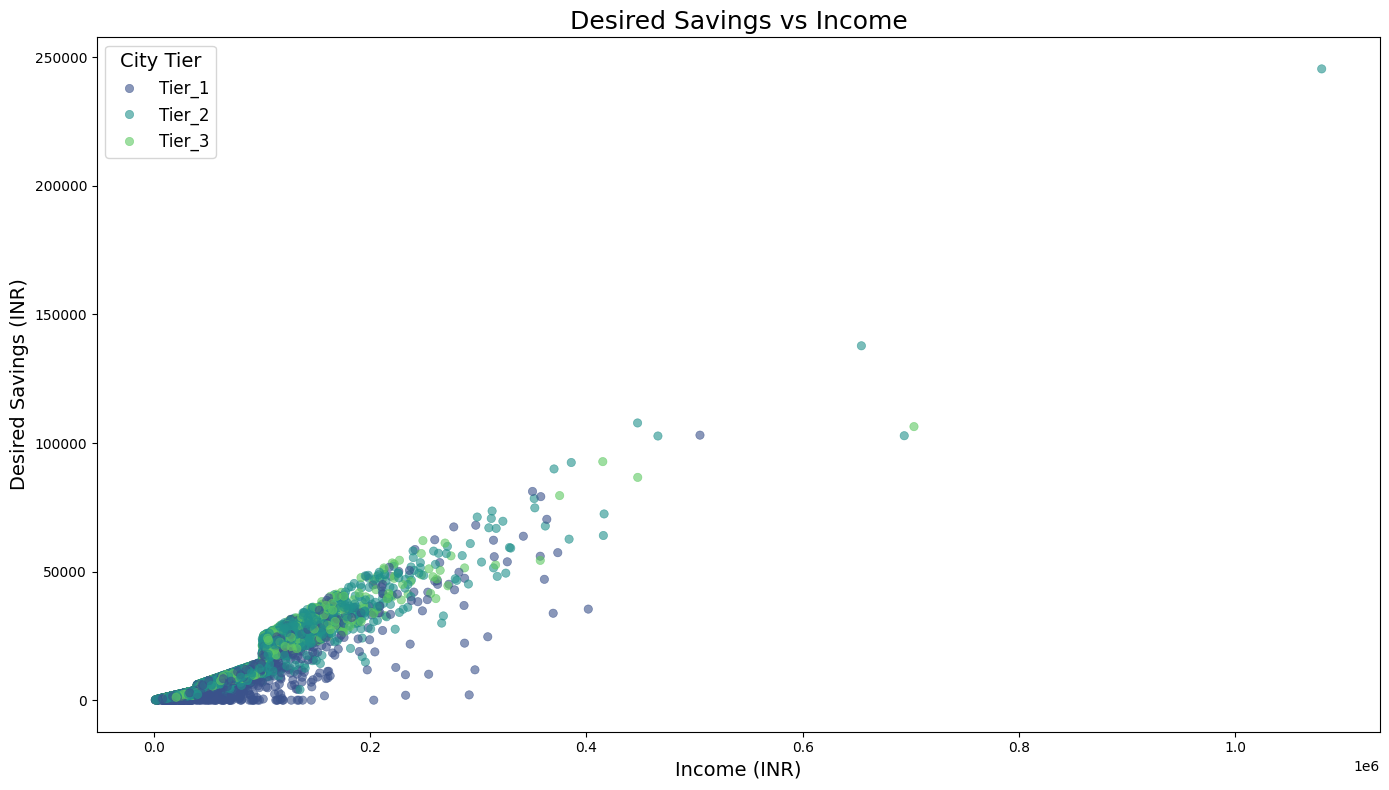

In [32]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='Income',
    y='Desired_Savings',
    hue='City_Tier',
    palette='viridis',
    alpha=0.6,
    edgecolor=None
)
plt.title('Desired Savings vs Income', fontsize=18)
plt.xlabel('Income (INR)', fontsize=14)
plt.ylabel('Desired Savings (INR)', fontsize=14)
plt.legend(title='City Tier', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

Observations:
There is a positive correlation between income and desired savings, with higher incomes leading to higher savings goals.
Users across all city tiers follow similar savings trends, but higher-income users show more variability in their savings.
Most users are concentrated at lower income levels, with a few outliers having significantly higher incomes and desired savings.

### 4.2 Potential Savings Across Categories
Understanding how much users can potentially save in each expense category.

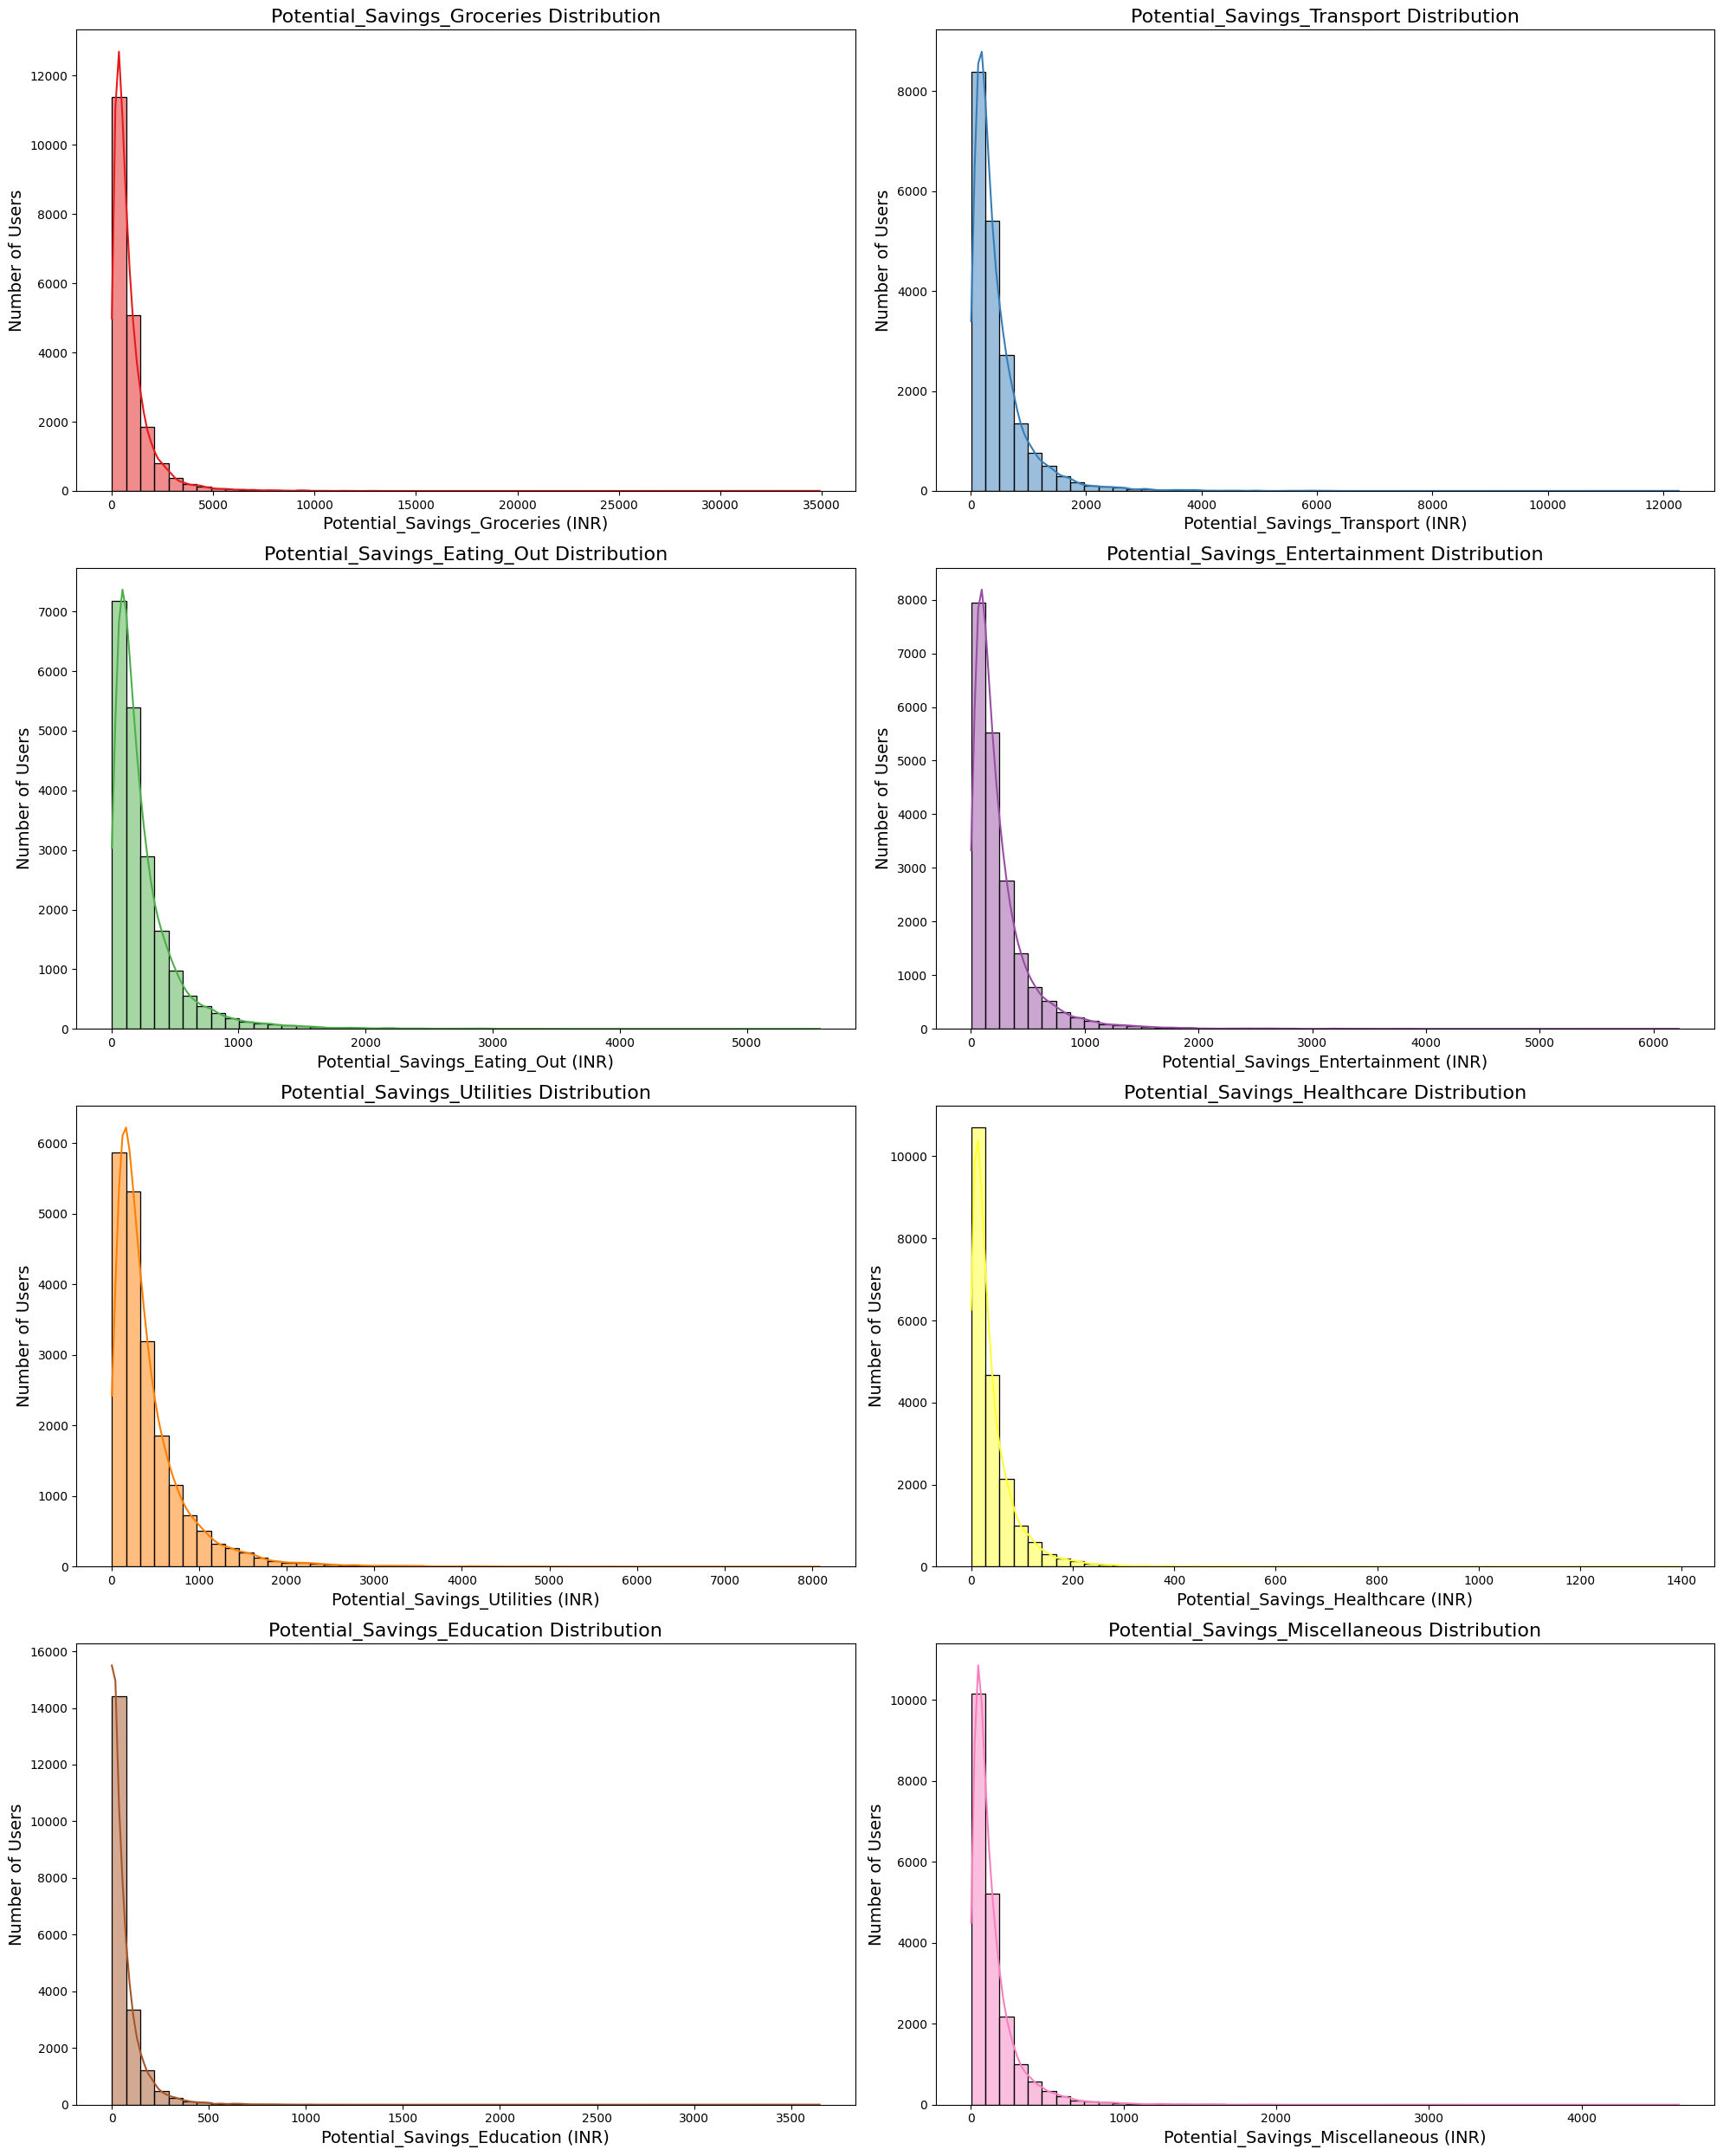

In [33]:
potential_savings_columns = [col for col in df.columns if col.startswith('Potential_Savings')]

num_potential = len(potential_savings_columns)
palette_potential = sns.color_palette("Set1", num_potential)

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for ax, column, color in zip(axes, potential_savings_columns, palette_potential):
    sns.histplot(df[column], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=16)
    ax.set_xlabel(f'{column} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

Observations:
Potential Savings Distribution: Across all expense categories, potential savings are highly skewed towards lower values, indicating that most users have limited savings potential in each category.
Groceries and Transport: These categories show relatively higher potential savings compared to others, suggesting room for users to optimize spending in these areas.
Healthcare and Education: Potential savings are minimal, reflecting the essential nature of these expenses, where users have less flexibility to cut costs.

## 5. Correlation Analysis 
Analyzing correlations between different financial aspects.

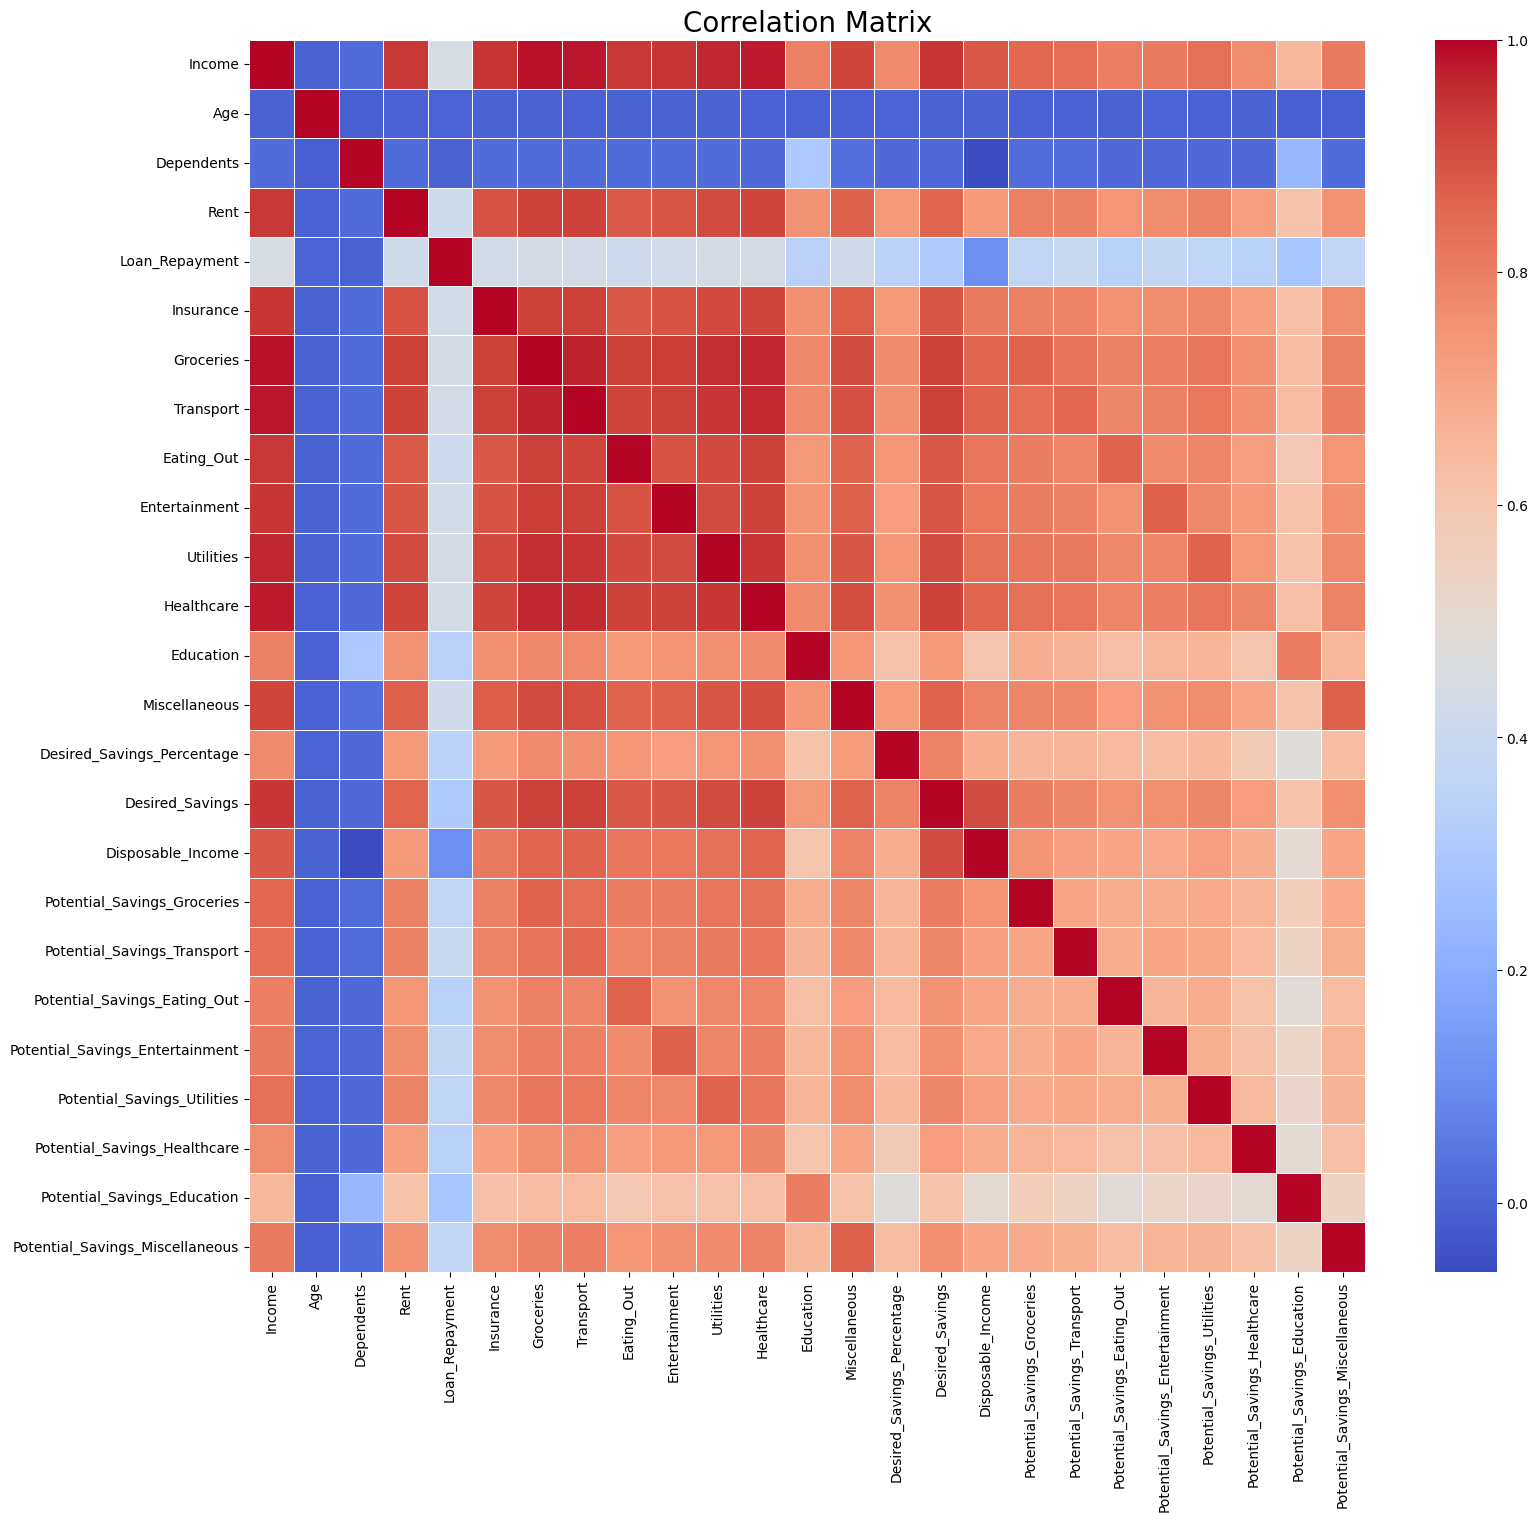

In [34]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

Observations:
Income Correlations: Income shows a strong positive correlation with expenses like rent, loan repayment, and insurance, indicating that higher earners tend to spend more on these fixed costs.
Desired Savings: Desired savings correlate positively with income and disposable income, suggesting that as income increases, so do savings goals.
Expense Relationships: There are strong correlations among different expense categories (e.g., groceries, transport, and utilities), reflecting that higher spending in one area is often associated with increased spending in others.


In [37]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [1]:
%reload_ext kedro.ipython

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:61

                    INFO     Registered line magic '%load_node'                                      __init__.py:63

                    INFO     Resolved project path as: /Volumes/Macintosh HD                        __init__.py:178
                             2/Users/vikrambaha/QF-YEAR-2/ML/projects/savings-prediction.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/12/25 20:17:15] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:233
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project savings prediction                                       __init__.py:144

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:145
                             'pipelines'                                                                           

[01/12/25 20:17:16] INFO     Registered line magic 'run_viz'                                        __init__.py:151

In [2]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]

target_columns = [f'Potential_Savings_{cat}' for cat in variable_expenses]

numerical_features = [
    'Income', 'Age', 'Dependents', 'Disposable_Income', 'Desired_Savings'
] + variable_expenses 

categorical_features = ['Occupation', 'City_Tier']


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse_output=False)

encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_cat_columns = encoder.get_feature_names_out(categorical_features)

df_encoded_cats = pd.DataFrame(encoded_cats, columns=encoded_cat_columns)
#df_features = pd.concat([df[numerical_features], df_encoded_cats], axis=1)


In [23]:
df_encoded_cats

,Occupation_Retired,Occupation_Self_Employed,Occupation_Student,City_Tier_Tier_2,City_Tier_Tier_3
0,0.0000,1.0000,0.0000,0.0000,0.0000
1,1.0000,0.0000,0.0000,1.0000,0.0000
2,0.0000,0.0000,1.0000,0.0000,1.0000
3,0.0000,1.0000,0.0000,0.0000,1.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000
...,...,...,...,...,...
19995,0.0000,1.0000,0.0000,0.0000,0.0000
19996,0.0000,0.0000,1.0000,1.0000,0.0000
19997,0.0000,0.0000,0.0000,1.0000,0.0000
19998,0.0000,0.0000,0.0000,0.0000,0.0000
